In [1]:
import sys
import os
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

project_root = os.path.dirname(os.path.abspath(os.getcwd()))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
    
from src.data_processing.resultMetaUtils import frameFromResultMeta, deleteRunsFromResults
from src.loaders.dataLoader import CustomDataLoader
from src.core.constants import AUTO, ORDERFLOWS, ORDERBOOKS, RESULTS_CSVS, PROJECT_ROOT

In [3]:
# Create the datatframe from the results meta
df = frameFromResultMeta()
print(sorted(df.columns))
cols = [
    'run_id',
    'meta.ticker', 'meta.numEpoch', 'meta.lookForwardHorizon', 'meta.rowLim', 'meta.representation', 'meta.model',
    'metrics.accuracy', 'metrics.confusion_matrix', 'metrics.f1', 'metrics.precision', 'metrics.recall',
]
df = df[cols]
display(df)

c:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\src\data_processing\resultMetaUtils.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.json_normalize(data)], ignore_index=True)
c:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\src\data_processing\resultMetaUtils.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.json_normalize(data)], ignore_index=True)
c:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\src\data_processing\resultMetaUtils.py:34: Futur

['accuracy', 'datetime', 'meta.batchSize', 'meta.labelType', 'meta.lookForwardHorizon', 'meta.maxFiles', 'meta.model', 'meta.modelKwargs.shape', 'meta.numEpoch', 'meta.representation', 'meta.rowLim', 'meta.scaling', 'meta.startDate', 'meta.steps', 'meta.threshold', 'meta.ticker', 'meta.trainDays', 'meta.trainTestSplit', 'metrics.MAE', 'metrics.MAPE', 'metrics.MSE', 'metrics.R2', 'metrics.accuracy', 'metrics.confusion_matrix', 'metrics.f1', 'metrics.precision', 'metrics.recall', 'metricsStrength.accuracy@>0.4', 'metricsStrength.accuracy@>0.5', 'metricsStrength.accuracy@>0.6', 'metricsStrength.accuracy@>0.7', 'metricsStrength.accuracy@>0.8', 'metricsStrength.accuracy@>0.9', 'metricsStrength.accuracy@|>0.4', 'metricsStrength.accuracy@|>0.5', 'metricsStrength.accuracy@|>0.6', 'metricsStrength.accuracy@|>0.7', 'metricsStrength.accuracy@|>0.8', 'metricsStrength.accuracy@|>0.9', 'metricsStrength.coverage@>0.4', 'metricsStrength.coverage@>0.5', 'metricsStrength.coverage@>0.6', 'metricsStrength

,run_id,meta.ticker,meta.numEpoch,meta.lookForwardHorizon,meta.rowLim,meta.representation,meta.model,metrics.accuracy,metrics.confusion_matrix,metrics.f1,metrics.precision,metrics.recall
0,0y7OaOkl,AMZN,5,50,1000000,orderbooks,deepLOB_TF,NaN,NaN,NaN,NaN,NaN
1,15Aoi21E,NVDA,3,500,1000000,orderbooks,deepLOB_TF,0.70226,"[[0, 15273, 0], [0, 70226, 0], [0, 14501, 0]]",0.275030,0.234087,0.333333
2,1MsXo8jI,AAPL,5,20,1000000,orderbooks,deepLOB_TF,NaN,NaN,NaN,NaN,NaN
3,2GPfMf8y,AMZN,1,20,1000000,NaN,deepLOB_PT,NaN,NaN,NaN,NaN,NaN
4,2H76Jwit,AAPL,5,10,1000,orderbooks,deepLOB_TF,0.59000,"[[0, 12, 0], [0, 59, 0], [0, 29, 0]]",0.247379,0.196667,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
187,zOu34vA7,NVDA,3,500,100000,orderflows,deepLOBREG_TF,NaN,NaN,NaN,NaN,NaN
188,ZqKPhyvX,NVDA,1,10,1000000,orderbooks,deepLOB_TF,NaN,NaN,NaN,NaN,NaN
189,ZSy4YAJl,NFLX,5,200,1000000,orderbooks,deepLOB_TF,NaN,NaN,NaN,NaN,NaN
190,zTwpTd8t,MSFT,5,200,1000000,orderbooks,deepLOB_TF,NaN,NaN,NaN,NaN,NaN


In [14]:
# Temp for deleting some data
tmp = df.loc[df['metrics.accuracy'] < 0.3]
runIDs = tmp['run_id'].values
runIDs
# deleteRunsFromResults(runIDs=runIDs, dryRun=False)

array([], dtype=object)

In [58]:
cdl = CustomDataLoader(
        ticker='NFLX',
        scaling=True,
        horizon=100,
        threshold=AUTO,
        maxFiles=1,
        rowLim=100_000,
        trainTestSplit=0.99,
        lookForwardHorizon=20,
        representation=ORDERFLOWS
)
cdl.runFullProcessReturnXY(tensor=True)
print(cdl.x.shape)
print(cdl.y.shape)
x_test, y_test = cdl.getTestData()
y_test.sum(dim=0)

Extracting data from files...


100%|██████████| 1/1 [00:00<00:00, 26.23it/s]


Auto threshold z-score cutoffs: lower=-0.269, upper=0.272, using threshold=0.271
Extracting data from files...


100%|██████████| 1/1 [00:00<00:00, 46.28it/s]

Train set size: 76925, Test set size: 778
torch.Size([76925, 100, 20, 1])
torch.Size([76925, 3])


tensor([259., 366., 134.])

In [5]:
orderbook = df

orderbook.dropna(subset=['metrics.accuracy'], inplace=True)
orderbook = orderbook[orderbook['meta.lookForwardHorizon'] < 2000]
# print(orderbook)

# Conditions for orderbooks training
conditions = {
    'meta.rowLim': 1000000,
    'meta.representation': 'orderbooks',
    # 'meta.numEpoch': 5,
    'meta.model': 'deepLOB_TF'
}

for condition, value in conditions.items():
    orderbook = orderbook[orderbook[condition] == value]

tickers = orderbook['meta.ticker'].unique()

orderbooks = []
for ticker in tickers:
    orderbooks.append(
        orderbook.loc[orderbook['meta.ticker'] == ticker].sort_values('meta.lookForwardHorizon')
    )
# orderbooks

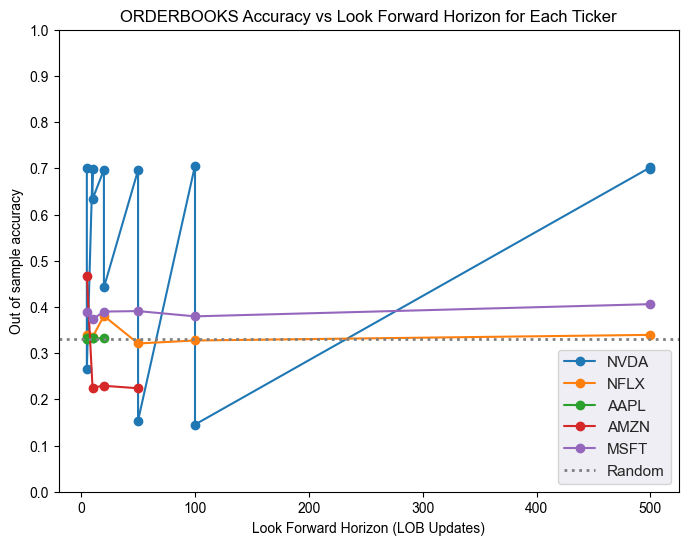

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set()
for d in orderbooks:
    d_sorted = d.sort_values('meta.lookForwardHorizon')
    ax.plot(
        d_sorted['meta.lookForwardHorizon'],
        d_sorted['metrics.accuracy'],
        marker='o',
        label=d_sorted['meta.ticker'].iloc[0]
    )
ax.set_xlabel('Look Forward Horizon (LOB Updates)')
ax.set_ylabel('Out of sample accuracy')
ax.set_ylim(0,1)
ax.set_title('ORDERBOOKS Accuracy vs Look Forward Horizon for Each Ticker')
ax.set_yticks([round(y, 1) for y in list(np.arange(0.0, 1.01, 0.1))])
ax.axhline(0.33, color='gray', linestyle=':', linewidth=2, label='Random')
ax.legend()
plt.show()

In [7]:
orderflow = df

# Conditions for orderbooks training
conditions = {
    'meta.rowLim': 1000000,
    # 'meta.numEpoch': 5,
    'meta.representation': 'orderflows',
}

for condition, value in conditions.items():
    orderflow = orderflow[orderflow[condition] == value]

tickers = orderflow['meta.ticker'].unique()

orderflows = []
for ticker in tickers:
    orderflows.append(
        orderflow.loc[orderflow['meta.ticker'] == ticker].sort_values('meta.lookForwardHorizon')
    )
    
# display(orderflow)

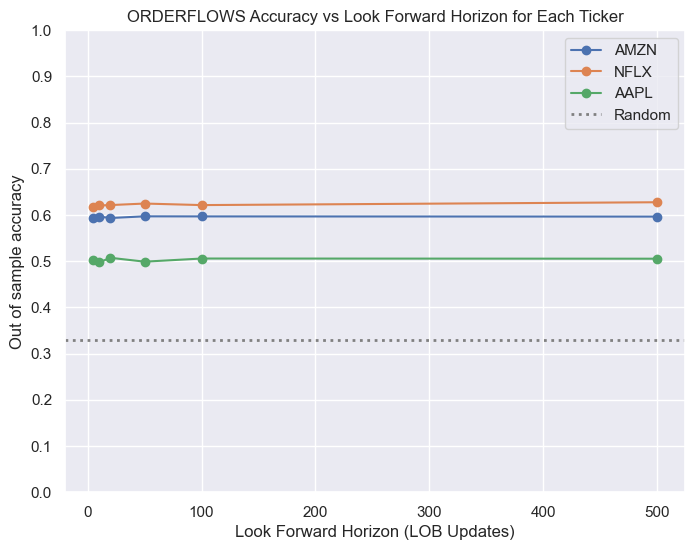

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.set()
for d in orderflows:
    ax.plot(
        d['meta.lookForwardHorizon'],
        d['metrics.accuracy'],
        marker='o',
        label=d['meta.ticker'].iloc[0]
    )
ax.set_xlabel('Look Forward Horizon (LOB Updates)')
ax.set_ylabel('Out of sample accuracy')
ax.set_ylim(0,1)
ax.set_title('ORDERFLOWS Accuracy vs Look Forward Horizon for Each Ticker')
ax.set_yticks([round(y, 1) for y in list(np.arange(0.0, 1.01, 0.1))])
ax.axhline(0.33, color='gray', linestyle=':', linewidth=2, label='Random')
ax.legend()
plt.show()

In [66]:
tickers_orderbooks = set(orderbook['meta.ticker'].unique())
tickers_orderflows = set(orderflow['meta.ticker'].unique())
inner_tickers = tickers_orderbooks.intersection(tickers_orderflows)

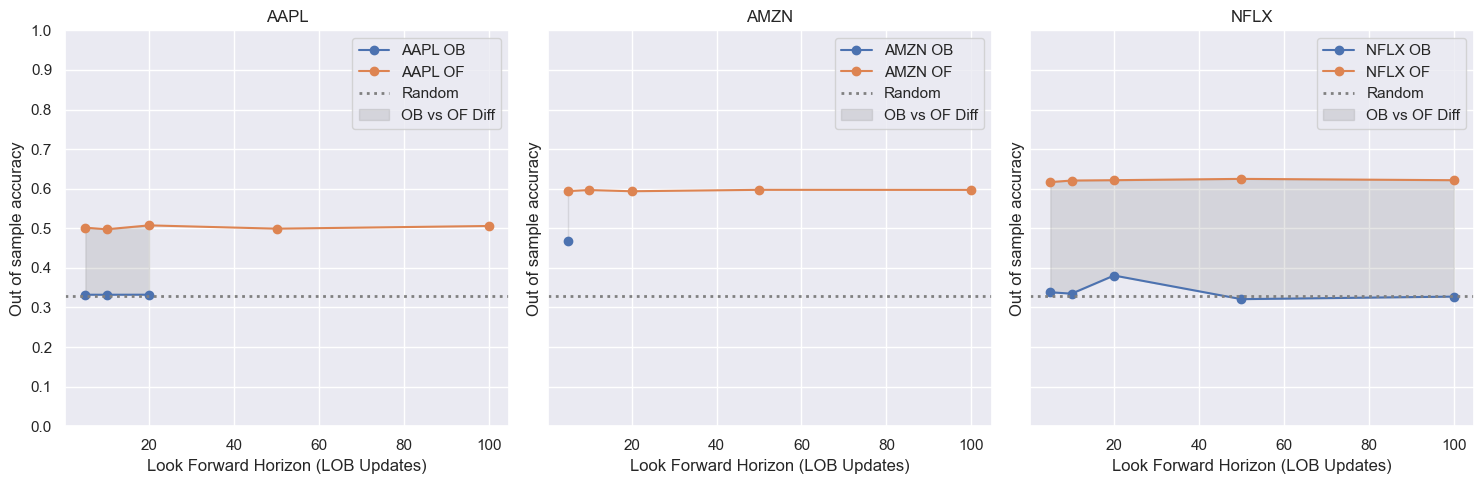

In [70]:
fig, axs = plt.subplots(1, len(inner_tickers), figsize=(15, 5), sharey=True)
if len(inner_tickers) == 1:
    axs = [axs]

for id, ticker in enumerate(sorted(inner_tickers)):
    # For each horizon, pick the first (or best) result for OB and OF
    ob = (
        orderbook[
            (orderbook['meta.ticker'] == ticker) &
            (orderbook['meta.representation'] == 'orderbooks') &
            (orderbook['meta.lookForwardHorizon'] <= 200)
        ]
        .sort_values(['meta.lookForwardHorizon', 'metrics.accuracy'], ascending=[True, False])
        .drop_duplicates(subset=['meta.lookForwardHorizon'], keep='first')
    )
    of = (
        orderflow[
            (orderflow['meta.ticker'] == ticker) &
            (orderflow['meta.representation'] == 'orderflows') &
            (orderflow['meta.lookForwardHorizon'] <= 200)
        ]
        .sort_values(['meta.lookForwardHorizon', 'metrics.accuracy'], ascending=[True, False])
        .drop_duplicates(subset=['meta.lookForwardHorizon'], keep='first')
    )
    ax = axs[id]
    ax.plot(
        ob['meta.lookForwardHorizon'],
        ob['metrics.accuracy'],
        marker='o',
        label=f"{ob['meta.ticker'].iloc[0]} OB"
    )
    ax.plot(
        of['meta.lookForwardHorizon'],
        of['metrics.accuracy'],
        marker='o',
        label=f"{of['meta.ticker'].iloc[0]} OF"
    )
    ax.axhline(0.33, color='gray', linestyle=':', linewidth=2, label='Random')
    ax.set_title(ticker)
    ax.set_xlabel('Look Forward Horizon (LOB Updates)')
    ax.set_ylabel('Out of sample accuracy')  # Set y-axis label for all
    ax.set_ylim(0, 1)
    ax.set_yticks([round(y, 1) for y in np.arange(0.0, 1.01, 0.1)])
    # Align OB and OF on lookForwardHorizon for fill_between
    merged = pd.merge(
        ob[['meta.lookForwardHorizon', 'metrics.accuracy']],
        of[['meta.lookForwardHorizon', 'metrics.accuracy']],
        on='meta.lookForwardHorizon',
        suffixes=('_ob', '_of')
    )
    ax.fill_between(
        merged['meta.lookForwardHorizon'],
        merged['metrics.accuracy_ob'],
        merged['metrics.accuracy_of'],
        color='gray',
        alpha=0.2,
        label='OB vs OF Diff'
    )
    ax.legend()
plt.tight_layout()
plt.show()


[Text(0, 0.5, 'Down (↓)'), Text(0, 1.5, 'Neutral (=)'), Text(0, 2.5, 'Up (↑)')]

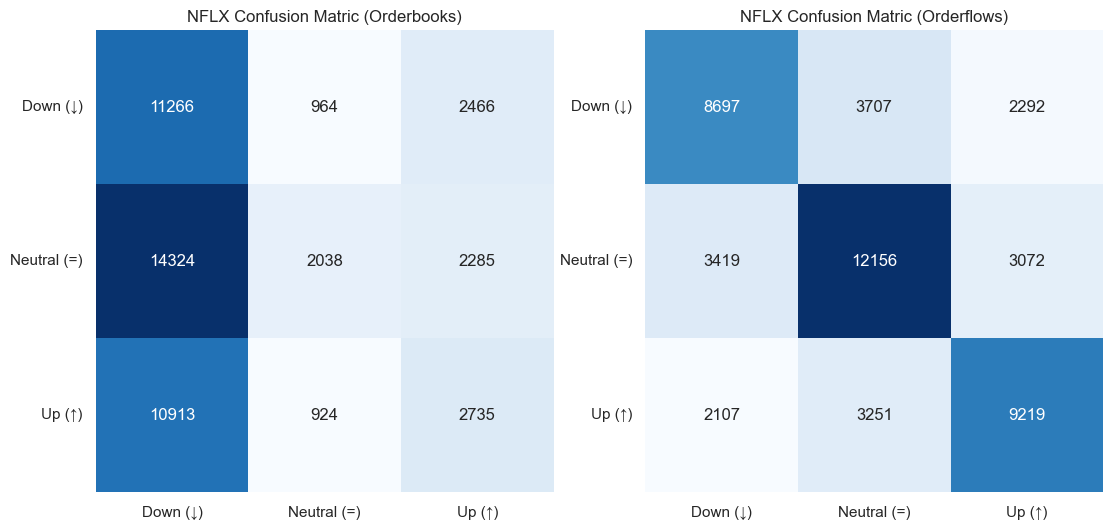

In [137]:
labels = ['Down (↓)', 'Neutral (=)',  'Up (↑)']
ticker = 'NFLX'

fig, ax = plt.subplots(1 , 2, figsize=(13, 6))


nflx_books = df.loc[(df['meta.ticker'] == ticker) & (df['meta.representation'] == 'orderbooks')]
nflx_books = nflx_books.sort_values(by='metrics.precision', ascending=False)
nflx_books.reset_index()
best_nflx_conf_books = nflx_books.iloc[0]['metrics.confusion_matrix']
sns.heatmap(best_nflx_conf_books, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax[0], cbar=False)
ax[0].set_title(f"{ticker} Confusion Matric (Orderbooks)")
ax[0].set_yticklabels(labels, rotation=0)

nflx_flows = df.loc[(df['meta.ticker'] == ticker) & (df['meta.representation'] == 'orderflows')]
nflx_flows = nflx_flows.sort_values(by='metrics.precision', ascending=False)
nflx_flows.reset_index()
best_nflx_conf_flows = nflx_flows.iloc[0]['metrics.confusion_matrix']
sns.heatmap(best_nflx_conf_flows, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax[1], cbar=False)
ax[1].set_title(f"{ticker} Confusion Matric (Orderflows)")
ax[1].set_yticklabels(labels, rotation=0)

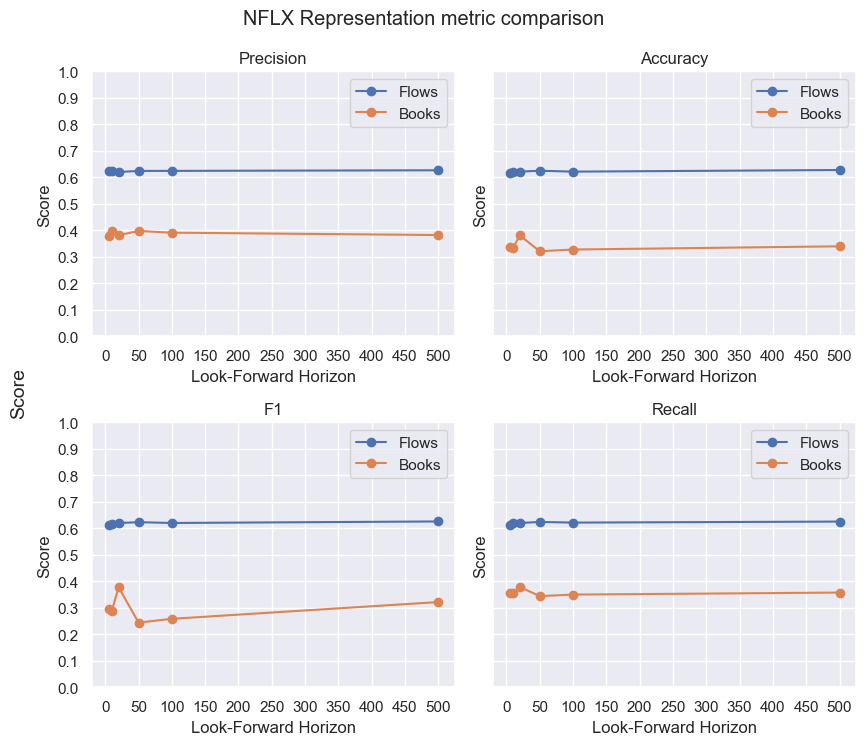

In [174]:
sorted_flows = nflx_flows.sort_values('meta.lookForwardHorizon')
sorted_books = nflx_books.sort_values('meta.lookForwardHorizon')

metrics = ['precision', 'accuracy', 'f1', 'recall']

fig, axs = plt.subplots(2, 2, figsize=(9, 8), sharey=True)  # no sharex
axs = axs.flatten()

for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.plot(
        sorted_flows['meta.lookForwardHorizon'],
        sorted_flows[f'metrics.{metric}'],
        marker='o',
        label='Flows'
    )
    ax.plot(
        sorted_books['meta.lookForwardHorizon'],
        sorted_books[f'metrics.{metric}'],
        marker='o',
        label='Books'
    )
    ax.set_title(metric.capitalize())
    ax.grid(True)
    ax.set_ylim(0, 1)
    ax.legend()
    ax.set_xlabel('Look-Forward Horizon')
    ax.set_ylabel('Score')
    ax.set_xticks(np.linspace(0, 500, 11))   # set xticks on each plot
    ax.set_yticks(np.linspace(0, 1, 11))

fig.text(0.04, 0.5, 'Score', va='center', rotation='vertical', fontsize=14)
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
fig.suptitle(f"{ticker} Representation metric comparison")
plt.show()


In [8]:
df2 = frameFromResultMeta()
print(sorted(df2.columns))
df2 = df2[df2['datetime'].astype(str).str.contains('2025-07-28')]

df2


c:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\src\data_processing\resultMetaUtils.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.json_normalize(data)], ignore_index=True)
c:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\src\data_processing\resultMetaUtils.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.json_normalize(data)], ignore_index=True)
c:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\src\data_processing\resultMetaUtils.py:34: Futur

['accuracy', 'datetime', 'meta.batchSize', 'meta.labelType', 'meta.lookForwardHorizon', 'meta.maxFiles', 'meta.model', 'meta.modelKwargs.shape', 'meta.numEpoch', 'meta.representation', 'meta.rowLim', 'meta.scaling', 'meta.startDate', 'meta.steps', 'meta.threshold', 'meta.ticker', 'meta.trainDays', 'meta.trainTestSplit', 'metrics.MAE', 'metrics.MAPE', 'metrics.MSE', 'metrics.R2', 'metrics.accuracy', 'metrics.confusion_matrix', 'metrics.f1', 'metrics.precision', 'metrics.recall', 'metricsStrength.accuracy@>0.4', 'metricsStrength.accuracy@>0.5', 'metricsStrength.accuracy@>0.6', 'metricsStrength.accuracy@>0.7', 'metricsStrength.accuracy@>0.8', 'metricsStrength.accuracy@>0.9', 'metricsStrength.accuracy@|>0.4', 'metricsStrength.accuracy@|>0.5', 'metricsStrength.accuracy@|>0.6', 'metricsStrength.accuracy@|>0.7', 'metricsStrength.accuracy@|>0.8', 'metricsStrength.accuracy@|>0.9', 'metricsStrength.coverage@>0.4', 'metricsStrength.coverage@>0.5', 'metricsStrength.coverage@>0.6', 'metricsStrength

c:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\src\data_processing\resultMetaUtils.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.json_normalize(data)], ignore_index=True)
c:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\src\data_processing\resultMetaUtils.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.json_normalize(data)], ignore_index=True)
c:\Users\benhu\UCL\Term 3\HSBC\deep-lob-project\src\data_processing\resultMetaUtils.py:34: Futur

,run_id,accuracy,meta.model,meta.numEpoch,meta.ticker,meta.steps,meta.trainTestSplit,meta.maxFiles,meta.threshold,meta.rowLim,...,metricsStrength.accuracy@|>0.6,metricsStrength.coverage@|>0.6,metricsStrength.accuracy@|>0.7,metricsStrength.coverage@|>0.7,metricsStrength.accuracy@|>0.8,metricsStrength.coverage@|>0.8,metricsStrength.accuracy@|>0.9,metricsStrength.coverage@|>0.9,meta.startDate,meta.trainDays
9,46UQucjH,NaN,deepLOB_TF,3,MSFT,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,4zmwI8Xv,NaN,deepLOB_TF,3,NVDA,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,6FyT4fg8,NaN,deepLOBREG_TF,3,NVDA,"[TRAIN, TEST]",0.9,5,auto,100000,...,1.000000,0.0003,NaN,0.0000,NaN,0.0000,NaN,0.0000,NaN,NaN
22,70qazyrb,NaN,deepLOB_TF,3,MSFT,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,8HCMJB88,NaN,deepLOBREG_TF,3,NVDA,"[TRAIN, TEST]",0.9,5,auto,100000,...,0.918919,0.0037,0.964286,0.0028,1.000000,0.0016,NaN,0.0000,NaN,NaN
30,ad0RIHX3,NaN,deepLOBREG_TF,3,NVDA,"[TRAIN, TEST]",0.9,5,auto,100000,...,1.000000,0.0008,1.000000,0.0002,NaN,0.0000,NaN,0.0000,NaN,NaN
38,B551QsL3,NaN,deepLOBREG_TF,3,MSFT,"[TRAIN, TEST]",0.9,5,auto,100000,...,0.773946,0.0783,0.827684,0.0354,0.875000,0.0104,0.739130,0.0023,NaN,NaN
40,bayO62cZ,NaN,deepLOBREG_TF,3,AAPL,"[TRAIN, TEST]",0.9,5,auto,100000,...,0.757225,0.1903,0.812339,0.1167,0.835106,0.0752,0.866667,0.0300,NaN,NaN
51,ch3zM9fc,NaN,deepLOBREG_TF,3,AAPL,"[TRAIN, TEST]",0.9,5,auto,100000,...,0.681833,0.2989,0.719758,0.1984,0.803587,0.1115,0.833671,0.0493,NaN,NaN
63,Enq0M8b9,NaN,deepLOB_TF,3,NVDA,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
categorical = df2.loc[df2['meta.labelType'] == 'CATEGORICAL']
regression = df2.loc[df2['meta.labelType'] == 'REGRESSION']

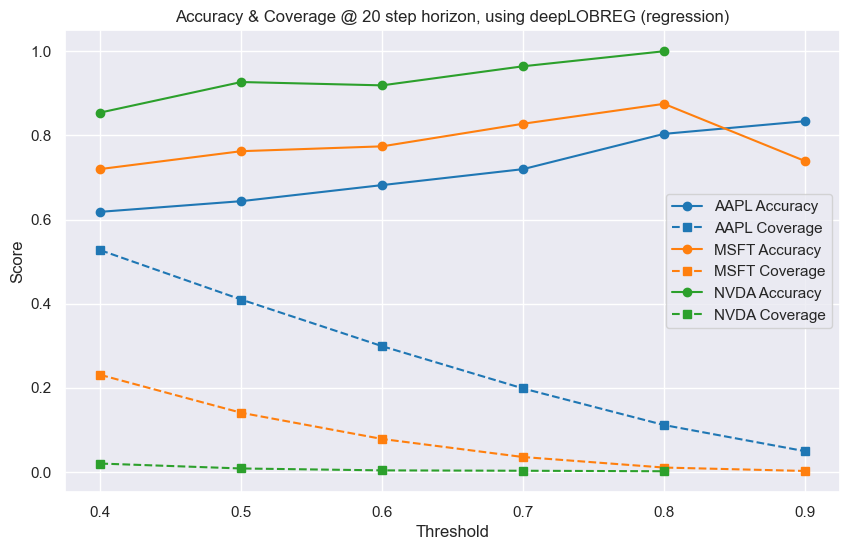

In [13]:
regression_tickers = sorted(categorical['meta.ticker'].unique())
horizon = 20
thresholds = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
sns.set()
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors  # get a list of colors

for idx, ticker in enumerate(regression_tickers):
    subset = regression[(regression['meta.ticker'] == ticker) & (regression['meta.lookForwardHorizon'] == horizon)]
    acc_y, cov_y, x_vals = [], [], []
    for thresh in thresholds:
        acc_col = f'metricsStrength.accuracy@|>{thresh}'
        cov_col = f'metricsStrength.coverage@|>{thresh}'
        if acc_col in subset.columns and cov_col in subset.columns:
            acc_val = subset.iloc[0][acc_col]
            cov_val = subset.iloc[0][cov_col]
            if not pd.isna(acc_val) and not pd.isna(cov_val):
                x_vals.append(thresh)
                acc_y.append(acc_val)
                cov_y.append(cov_val)
    color = colors[idx % len(colors)]
    plt.plot(x_vals, acc_y, marker='o', label=f'{ticker} Accuracy', color=color)
    plt.plot(x_vals, cov_y, marker='s', label=f'{ticker} Coverage', color=color, linestyle='--')

plt.title(f'Accuracy & Coverage @ {horizon} step horizon, using deepLOBREG (regression)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

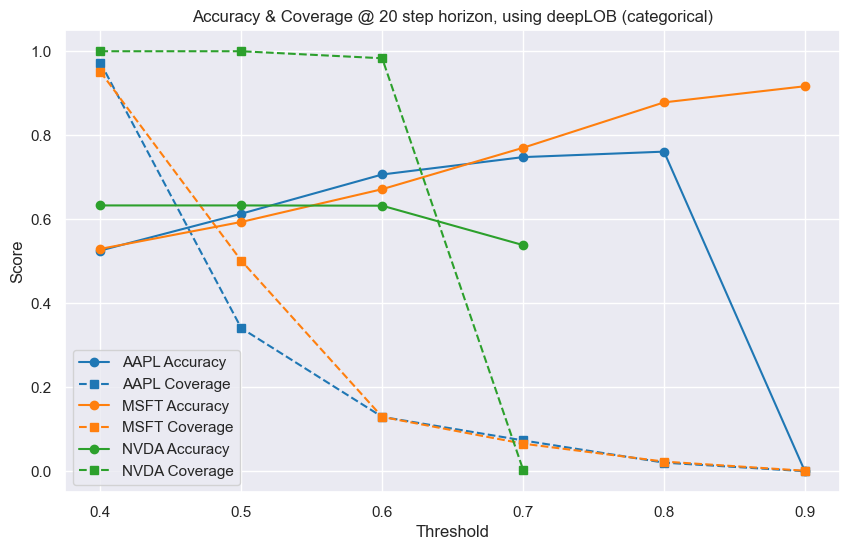

In [12]:
categorical_tickers = sorted(categorical['meta.ticker'].unique())
horizon = 20
thresholds = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10, 6))
colors = plt.cm.tab10.colors  # get a list of colors

for idx, ticker in enumerate(categorical_tickers):
    subset = categorical[(categorical['meta.ticker'] == ticker) & (categorical['meta.lookForwardHorizon'] == horizon)]
    acc_y, cov_y, x_vals = [], [], []
    for thresh in thresholds:
        acc_col = f'metricsStrength.accuracy@>{thresh}'
        cov_col = f'metricsStrength.coverage@>{thresh}'
        if acc_col in subset.columns and cov_col in subset.columns:
            acc_val = subset.iloc[0][acc_col]
            cov_val = subset.iloc[0][cov_col]
            if not pd.isna(acc_val) and not pd.isna(cov_val):
                x_vals.append(thresh)
                acc_y.append(acc_val)
                cov_y.append(cov_val)
    color = colors[idx % len(colors)]
    plt.plot(x_vals, acc_y, marker='o', label=f'{ticker} Accuracy', color=color)
    plt.plot(x_vals, cov_y, marker='s', label=f'{ticker} Coverage', color=color, linestyle='--')

plt.title(f'Accuracy & Coverage @ {horizon} step horizon, using deepLOB (categorical)')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
categorical

,run_id,accuracy,meta.model,meta.numEpoch,meta.ticker,meta.steps,meta.trainTestSplit,meta.maxFiles,meta.threshold,meta.rowLim,...,metricsStrength.accuracy@|>0.6,metricsStrength.coverage@|>0.6,metricsStrength.accuracy@|>0.7,metricsStrength.coverage@|>0.7,metricsStrength.accuracy@|>0.8,metricsStrength.coverage@|>0.8,metricsStrength.accuracy@|>0.9,metricsStrength.coverage@|>0.9,meta.startDate,meta.trainDays
8,46UQucjH,NaN,deepLOB_TF,3,MSFT,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,4zmwI8Xv,NaN,deepLOB_TF,3,NVDA,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,70qazyrb,NaN,deepLOB_TF,3,MSFT,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Enq0M8b9,NaN,deepLOB_TF,3,NVDA,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,F7YA5fwK,NaN,deepLOB_TF,3,AAPL,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,Hni777nD,NaN,deepLOB_TF,3,MSFT,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,iOtoYV8e,NaN,deepLOB_TF,3,AAPL,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,l4JJEwIy,NaN,deepLOB_TF,3,NVDA,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,mbt6nDtD,NaN,deepLOB_TF,3,NVDA,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,MYjTQOhO,NaN,deepLOB_TF,3,AAPL,"[TRAIN, TEST]",0.9,3,auto,100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# average volume, top 10 levels
processed_dir = os.path.join(project_root, '..', 'data', 'processed')
tickers = [name for name in os.listdir(processed_dir) if os.path.isdir(os.path.join(processed_dir, name))]
print(tickers)
time_col = 0

avg_diffs = {}
for ticker in tickers:
    ob_dir = os.path.join(processed_dir, ticker, 'orderbooks', 'scaled')
    if os.path.isdir(ob_dir):
        csv_files = [f for f in os.listdir(ob_dir) if f.endswith('.csv')]
        if csv_files:
            first_csv = sorted(csv_files)[0]
            csv_path = os.path.join(ob_dir, first_csv)
            df_ob = pl.read_csv(csv_path).to_pandas()
            # Compute the average difference between consecutive values in column 1
            col1 = df_ob.iloc[:, time_col]
            avg_diff = col1.diff().abs().mean()
            print(f"Ticker: {ticker}, Average Update difference: {avg_diff}")
            avg_diffs[ticker] = avg_diff
        else:
            print(f"No CSV files found in {ob_dir}")
    else:
        print(f"Directory does not exist: {ob_dir}")
    

['AAPL', 'CSCO', 'NFLX', 'NVDA', 'TSLA']
Ticker: AAPL, Average Update difference: 0.016324748125661145
Ticker: CSCO, Average Update difference: 0.04036218581027897
Ticker: NFLX, Average Update difference: 0.28448296189298344
Ticker: NVDA, Average Update difference: 0.008002265498323332
Ticker: TSLA, Average Update difference: 0.09110526379624949


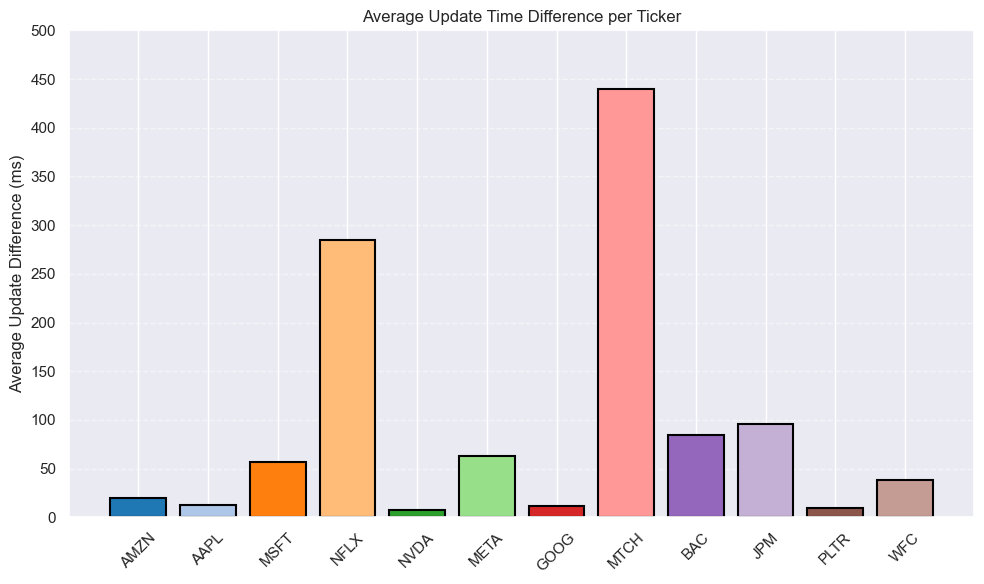

In [20]:
avg_update_diff = {
    'AMZN': 0.019377810755895137,
    'AAPL': 0.013083482103891014,
    'MSFT': 0.05652782381722122,
    'NFLX': 0.28448296189298344,
    'NVDA': 0.008002265498323332,
    'META': 0.06260781371282477,
    'GOOG': 0.011790209912208208,
    'MTCH': 0.4402842687979989,
    'BAC': 0.08487866186096288,
    'JPM': 0.09554441588830866,
    'PLTR': 0.00968540544796652,
    'WFC': 0.03834952569793524
}

plt.figure(figsize=(10, 6))
tickers = list(avg_update_diff.keys())
values = list(value * 1000 for value in avg_update_diff.values())
bars = plt.bar(tickers, values, color='skyblue')
plt.xticks(rotation=45)
plt.ylabel('Average Update Difference (ms)')
plt.title('Average Update Time Difference per Ticker')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.yticks(np.linspace(0, 500, 11))  # more ticks on y-axis
bar_colors = plt.cm.tab20.colors[:len(bars)]  # use tab20 for more distinct colors
for bar, color in zip(bars, bar_colors):
    bar.set_color(color)
    bar.set_edgecolor('black')
    bar.set_linewidth(1.5)
plt.tight_layout()
plt.show()

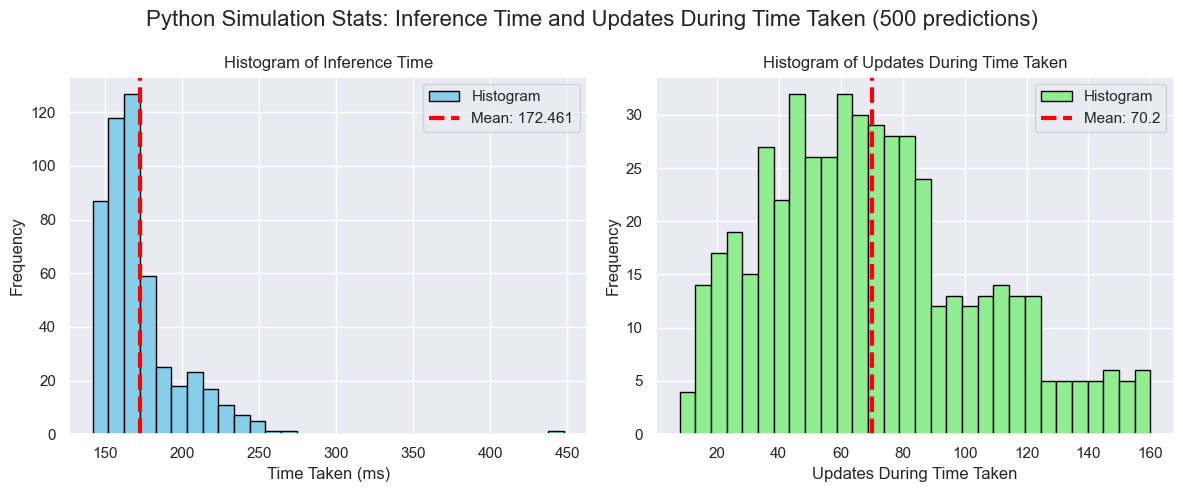

In [19]:
simResults = pl.read_csv(f'{PROJECT_ROOT}/{RESULTS_CSVS}/pythonSimData.csv').to_pandas().head(500)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.set()
# Histogram for timeTaken
ms_tt = [tt*1000 for tt in simResults['timeTaken']]
axs[0].hist(ms_tt, bins=30, color='skyblue', edgecolor='black', label='Histogram')
mean_time = np.mean(ms_tt)
axs[0].axvline(mean_time, color='red', linestyle='--', linewidth=3, label=f'Mean: {mean_time:.3f}')
axs[0].set_title('Histogram of Inference Time')
axs[0].set_xlabel('Time Taken (ms)')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# Histogram for updatesDuringTimeTaken
axs[1].hist(simResults['updatesDuringTimeTaken'], bins=30, color='lightgreen', edgecolor='black', label='Histogram')
mean_updates = simResults['updatesDuringTimeTaken'].mean()
axs[1].axvline(mean_updates, color='red', linestyle='--', linewidth=3, label=f'Mean: {mean_updates:.1f}')
axs[1].set_title('Histogram of Updates During Time Taken')
axs[1].set_xlabel('Updates During Time Taken')
axs[1].set_ylabel('Frequency')
axs[1].legend()

fig.suptitle(f'Python Simulation Stats: Inference Time and Updates During Time Taken ({len(simResults)} predictions)', fontsize=16)
plt.tight_layout()
plt.show()